Création dataset final

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = r"C:\Users\David\Documents\Albert school\Carmila alberton\Data for the CARMILA challenge\merged_data4.csv"
df = pd.read_csv(file_path)

In [2]:
df.head()

,Jour,heure,Site,Zone,Entrées,Code ensemble immobilier,Mall ID,Année,Mois,heure_num,...,OE_2024-12-26,OE_2024-08-15,Centre,H_Lundi,H_Mardi,H_Mercredi,H_Jeudi,H_Vendredi,H_Samedi,H_Dimanche
0,2023-01-01,00:00 - 00:59,Antibes,Centre Commercial,0.0,FB007,53,2023,1,0.0,...,0,0,Centre commercial Carrefour Antibes,09:00-19:30,09:00-19:30,09:00-19:30,09:00-19:30,09:00-19:30,09:00-19:30,NaN
1,2023-01-01,01:00 - 01:59,Antibes,Centre Commercial,0.0,FB007,53,2023,1,1.0,...,0,0,Centre commercial Carrefour Antibes,09:00-19:30,09:00-19:30,09:00-19:30,09:00-19:30,09:00-19:30,09:00-19:30,NaN
2,2023-01-01,02:00 - 02:59,Antibes,Centre Commercial,0.0,FB007,53,2023,1,2.0,...,0,0,Centre commercial Carrefour Antibes,09:00-19:30,09:00-19:30,09:00-19:30,09:00-19:30,09:00-19:30,09:00-19:30,NaN
3,2023-01-01,03:00 - 03:59,Antibes,Centre Commercial,0.0,FB007,53,2023,1,3.0,...,0,0,Centre commercial Carrefour Antibes,09:00-19:30,09:00-19:30,09:00-19:30,09:00-19:30,09:00-19:30,09:00-19:30,NaN
4,2023-01-01,04:00 - 04:59,Antibes,Centre Commercial,0.0,FB007,53,2023,1,4.0,...,0,0,Centre commercial Carrefour Antibes,09:00-19:30,09:00-19:30,09:00-19:30,09:00-19:30,09:00-19:30,09:00-19:30,NaN


In [3]:
df.columns

Index(['Jour', 'heure', 'Site', 'Zone', 'Entrées', 'Code ensemble immobilier',
       'Mall ID', 'Année', 'Mois', 'heure_num', 'jour_semaine', 'mois',
       'annee', 'GLA centre (hyper + galerie+ mail) GI',
       'GLA boutiques (hors mail - GI)',
       'Nombre places de parking (Assetbook)',
       'Nombre de boutiques (hors hyper)', 'ALIMENTATION', 'EQ DE LA PERSONNE',
       'EQ DE LA MAISON', 'LOISIRS', 'RESTAURATION', 'SERVICES', 'DIVERS',
       'Centre_x', 'Clef Hyper Carrefour_x', 'FE_2024-11-01', 'FE_2024-12-25',
       'FE_2024-12-22', 'FE_2024-11-24', 'FE_2024-07-28', 'FE_2024-06-30',
       'FE_2025-01-01', 'FE_2024-08-04', 'FE_2024-07-14', 'FE_2024-12-01',
       'FE_2024-12-29', 'FE_2024-08-11', 'FE_2024-12-08', 'FE_2025-01-05',
       'FE_2024-09-01', 'FE_2025-05-01', 'FE_2025-12-25', 'Centre_y',
       'Clef Hyper Carrefour_y', 'OE_2024-11-01', 'OE_2024-11-11',
       'OE_2024-12-01', 'OE_2024-12-08', 'OE_2024-12-15', 'OE_2024-12-22',
       'OE_2024-12-24', 'OE_2024-

In [5]:
# ===============================================
# 1. Importation des bibliothèques et installation si nécessaire
# ===============================================
import pandas as pd
import numpy as np
import datetime
import requests
from bs4 import BeautifulSoup
import json
import warnings
warnings.filterwarnings('ignore')

In [7]:
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS

2025-02-01 17:48:53,419	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.6.5 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-02-01 17:48:53,862	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.6.5 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [9]:
# Remplacez 'votre_dataset.csv' par le chemin de votre fichier
df = pd.read_csv(file_path, parse_dates=['Jour'])

# Affichage rapide pour vérification
print("Dimensions du dataset initial :", df.shape)
print("Colonnes :", df.columns.tolist())


Dimensions du dataset initial : (175440, 78)
Colonnes : ['Jour', 'heure', 'Site', 'Zone', 'Entrées', 'Code ensemble immobilier', 'Mall ID', 'Année', 'Mois', 'heure_num', 'jour_semaine', 'mois', 'annee', 'GLA centre (hyper + galerie+ mail) GI', 'GLA boutiques (hors mail - GI)', 'Nombre places de parking (Assetbook)', 'Nombre de boutiques (hors hyper)', 'ALIMENTATION', 'EQ DE LA PERSONNE', 'EQ DE LA MAISON', 'LOISIRS', 'RESTAURATION', 'SERVICES', 'DIVERS', 'Centre_x', 'Clef Hyper Carrefour_x', 'FE_2024-11-01', 'FE_2024-12-25', 'FE_2024-12-22', 'FE_2024-11-24', 'FE_2024-07-28', 'FE_2024-06-30', 'FE_2025-01-01', 'FE_2024-08-04', 'FE_2024-07-14', 'FE_2024-12-01', 'FE_2024-12-29', 'FE_2024-08-11', 'FE_2024-12-08', 'FE_2025-01-05', 'FE_2024-09-01', 'FE_2025-05-01', 'FE_2025-12-25', 'Centre_y', 'Clef Hyper Carrefour_y', 'OE_2024-11-01', 'OE_2024-11-11', 'OE_2024-12-01', 'OE_2024-12-08', 'OE_2024-12-15', 'OE_2024-12-22', 'OE_2024-12-24', 'OE_2024-12-29', 'OE_2024-12-31', 'OE_2025-01-12', 'OE_20

In [10]:
# --- Conversion et transformation des colonnes ---
# 2.1. Convertir la colonne 'Entrées' en numérique (si nécessaire)
df['Entrées'] = pd.to_numeric(df['Entrées'], errors='coerce')


In [11]:
# 2.2. Traiter la colonne 'heure'
# On part du principe que 'heure' est au format "HH:MM - HH:MM"
def extraire_heure_debut(heure_str, jour):
    try:
        debut = heure_str.split(' - ')[0]
        # Concaténer la date et l'heure
        return pd.to_datetime(f"{jour.date()} {debut}", format='%Y-%m-%d %H:%M')
    except Exception as e:
        return pd.NaT


In [12]:
# Créer une colonne datetime 'ds' en combinant 'Jour' et 'heure'
df['ds'] = df.apply(lambda row: extraire_heure_debut(row['heure'], row['Jour']), axis=1)

# Créer également une colonne 'date' (sans l'heure) pour joindre les données externes
df['date'] = df['ds'].dt.floor('D')

In [13]:
# Vérifier les conversions
print("Exemple de datetime :", df['ds'].head())

Exemple de datetime : 0   2023-01-01 00:00:00
1   2023-01-01 01:00:00
2   2023-01-01 02:00:00
3   2023-01-01 03:00:00
4   2023-01-01 04:00:00
Name: ds, dtype: datetime64[ns]


In [14]:
# ===============================================
# 3. Feature Engineering
# ===============================================
# 3.1. Création d'indicateur d'ouverture
# On utilise les colonnes H_Lundi, H_Mardi, …, H_Dimanche pour définir les horaires d'ouverture
# On crée une fonction qui, pour chaque ligne, détermine si le centre est ouvert à l'instant 'ds'
weekday_mapping = {
    'Monday': 'H_Lundi',
    'Tuesday': 'H_Mardi',
    'Wednesday': 'H_Mercredi',
    'Thursday': 'H_Jeudi',
    'Friday': 'H_Vendredi',
    'Saturday': 'H_Samedi',
    'Sunday': 'H_Dimanche'
}

def est_ouvert(row):
    # Obtenir le jour en anglais depuis la date
    jour_en = row['ds'].strftime('%A')
    col_horaire = weekday_mapping.get(jour_en)
    horaire = row.get(col_horaire, None)
    if pd.isna(horaire) or horaire=='':
        return 0  # Fermé si pas d'info
    try:
        open_str, close_str = horaire.split('-')
        open_time = datetime.datetime.strptime(open_str.strip(), '%H:%M').time()
        close_time = datetime.datetime.strptime(close_str.strip(), '%H:%M').time()
        current_time = row['ds'].time()
        # Comparaison simple (attention aux horaires sur minuit, à adapter si besoin)
        return int(open_time <= current_time <= close_time)
    except:
        return 0

# Appliquer la fonction pour chaque ligne et stocker le résultat dans une nouvelle colonne
df['is_open'] = df.apply(est_ouvert, axis=1)

In [15]:
# 3.2. Extraction d'autres features temporelles utiles
df['hour'] = df['ds'].dt.hour
df['day_of_week'] = df['ds'].dt.dayofweek  # 0=Monday, 6=Sunday
df['month'] = df['ds'].dt.month

In [16]:
# 3.3. Transformation des indicateurs FE et OE en variables numériques (ils sont déjà binaires, sinon forçons la conversion)
fe_cols = [col for col in df.columns if col.startswith('FE_')]
oe_cols = [col for col in df.columns if col.startswith('OE_')]
for col in fe_cols + oe_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

In [26]:
import time
import requests
import datetime
import pandas as pd
import numpy as np

# ===============================================
# 1. API Functions with Timeout Handling
# ===============================================

def get_weather(lat, lon, date_str, api_key, timeout=5):
    """Fetch average temperature for a given date/location using OpenWeatherMap API."""
    try:
        dt_obj = datetime.datetime.strptime(date_str, '%Y-%m-%d').replace(hour=12)
        timestamp = int(dt_obj.timestamp())
        url = "http://api.openweathermap.org/data/2.5/onecall/timemachine"
        params = {'lat': lat, 'lon': lon, 'dt': timestamp, 'appid': api_key, 'units': 'metric'}
        response = requests.get(url, params=params, timeout=timeout)
        data = response.json()
        if 'hourly' in data:
            temps = [hour['temp'] for hour in data['hourly']]
            return np.mean(temps)
    except requests.Timeout:
        print(f"⚠️ Timeout: Weather API took too long for {lat}, {lon}, {date_str}")
    except Exception as e:
        print(f"⚠️ Weather API error for {lat}, {lon}, {date_str}: {e}")
    return np.nan

def get_sunrise_sunset(lat, lon, date_str, timeout=5):
    """Fetch sunrise and sunset times for a given date/location using Sunrise-Sunset API."""
    try:
        url = "https://api.sunrise-sunset.org/json"
        params = {'lat': lat, 'lng': lon, 'date': date_str, 'formatted': 0}
        response = requests.get(url, params=params, timeout=timeout)
        data = response.json()
        if data['status'] == 'OK':
            return data['results']['sunrise'], data['results']['sunset']
    except requests.Timeout:
        print(f"⚠️ Timeout: Sunrise API took too long for {lat}, {lon}, {date_str}")
    except Exception as e:
        print(f"⚠️ Sunrise API error for {lat}, {lon}, {date_str}: {e}")
    return np.nan, np.nan

# ===============================================
# 2. Load External Fuel Prices Dataset
# ===============================================

# Load the fuel prices dataset
fuel_df = pd.read_csv('fuel_prices.csv', parse_dates=['Date'], dayfirst=True)
fuel_df.rename(columns={'Date': 'date'}, inplace=True)

# Use Diesel prices as fuel_price reference
fuel_df['fuel_price'] = fuel_df['Diesel']

# Create a complete date range and fill missing values
all_dates = pd.DataFrame({'date': pd.date_range(start='2023-01-01', end='2024-12-31')})
fuel_full = pd.merge(all_dates, fuel_df[['date', 'fuel_price']], on='date', how='left')
fuel_full['fuel_price'] = fuel_full['fuel_price'].ffill().bfill()  # Forward & Backward Fill

# ===============================================
# 3. Mall Coordinates Mapping
# ===============================================

mall_coordinates = {
    5:  (48.117, -1.677),    # Rennes Cesson
    10: (48.897, 2.197),     # Montesson
    11: (43.707, 7.265),     # Nice Lingostière
    19: (48.514, -2.750),    # Langueux - Saint-Brieuc
    20: (47.063, -0.877),    # Cholet
    37: (43.492, -1.474),    # Bay 2
    38: (44.837, -0.579),    # BAB2
    47: (43.610, 3.880),     # Claira Salanca
    53: (43.580, 7.125),     # Antibes
    71: (49.564, 3.625)      # Laon
}

# ===============================================
# 4. Retrieve External Data and Merge with Main Dataset
# ===============================================

# Define OpenWeatherMap API Key
weather_api_key = 'cd00a35e9493ad4f037b8b8ee827f1aa'

# Extract unique dates and malls from the dataset
unique_dates = df['date'].drop_duplicates().sort_values().dt.strftime('%Y-%m-%d').tolist()
total_malls = len(df['Mall ID'].unique())
total_dates = len(unique_dates)

external_data = []
start_time = time.time()
counter = 0

for i, mall_id in enumerate(df['Mall ID'].unique(), 1):
    lat, lon = mall_coordinates.get(mall_id, (48.8566, 2.3522))  # Default to Paris if missing
    
    for j, d in enumerate(unique_dates, 1):
        counter += 1

        # Show progress every 100 iterations
        if counter % 100 == 0:
            elapsed_time = time.time() - start_time
            print(f"📊 Processing mall {i}/{total_malls}, date {j}/{total_dates} "
                  f"(Mall ID: {mall_id}, Date: {d}) - Elapsed time: {elapsed_time:.2f}s")

        try:
            # Fetch Weather Data
            avg_temp = get_weather(lat, lon, d, weather_api_key)
            
            # Get Fuel Price for the given date
            fuel_price_arr = fuel_full.loc[fuel_full['date'] == pd.to_datetime(d), 'fuel_price'].values
            fuel_price = fuel_price_arr[0] if len(fuel_price_arr) > 0 else np.nan
            
            # Fetch Sunrise & Sunset Times
            sunrise, sunset = get_sunrise_sunset(lat, lon, d)
            
            external_data.append({
                'Mall ID': mall_id,
                'date': pd.to_datetime(d),
                'avg_temp': avg_temp,
                'fuel_price': fuel_price,
                'sunrise': sunrise,
                'sunset': sunset
            })
        
        except Exception as e:
            print(f"⚠️ Error processing Mall ID {mall_id}, Date {d}: {e}")

        # Save a backup every 500 iterations
        if counter % 500 == 0:
            pd.DataFrame(external_data).to_csv("external_data_backup.csv", index=False)
            print("💾 Backup saved!")

# Convert to DataFrame
df_external = pd.DataFrame(external_data)
df_external['date'] = pd.to_datetime(df_external['date'])

# Merge with Main Dataset
df_merged = pd.merge(df, df_external, on=['Mall ID', 'date'], how='left')

print("✅ External Data Integration Completed Successfully!")


📊 Processing mall 1/10, date 100/731 (Mall ID: 53, Date: 2023-04-10) - Elapsed time: 77.33s
📊 Processing mall 1/10, date 200/731 (Mall ID: 53, Date: 2023-07-19) - Elapsed time: 154.29s
📊 Processing mall 1/10, date 300/731 (Mall ID: 53, Date: 2023-10-27) - Elapsed time: 233.04s
📊 Processing mall 1/10, date 400/731 (Mall ID: 53, Date: 2024-02-04) - Elapsed time: 312.70s
📊 Processing mall 1/10, date 500/731 (Mall ID: 53, Date: 2024-05-14) - Elapsed time: 393.09s
💾 Backup saved!
📊 Processing mall 1/10, date 600/731 (Mall ID: 53, Date: 2024-08-22) - Elapsed time: 471.93s
📊 Processing mall 1/10, date 700/731 (Mall ID: 53, Date: 2024-11-30) - Elapsed time: 550.47s
📊 Processing mall 2/10, date 69/731 (Mall ID: 38, Date: 2023-03-10) - Elapsed time: 621.91s
📊 Processing mall 2/10, date 169/731 (Mall ID: 38, Date: 2023-06-18) - Elapsed time: 689.88s
📊 Processing mall 2/10, date 269/731 (Mall ID: 38, Date: 2023-09-26) - Elapsed time: 758.83s
💾 Backup saved!
📊 Processing mall 2/10, date 369/731 (Ma

In [27]:
df_merged.head()

,Jour,heure,Site,Zone,Entrées,Code ensemble immobilier,Mall ID,Année,Mois,heure_num,...,ds,date,is_open,hour,day_of_week,month,avg_temp,fuel_price,sunrise,sunset
0,2023-01-01,00:00 - 00:59,Antibes,Centre Commercial,0.0,FB007,53,2023,1,0.0,...,2023-01-01 00:00:00,2023-01-01,0,0,6,1,NaN,1.767,2023-01-01T07:03:02+00:00,2023-01-01T16:06:50+00:00
1,2023-01-01,01:00 - 01:59,Antibes,Centre Commercial,0.0,FB007,53,2023,1,1.0,...,2023-01-01 01:00:00,2023-01-01,0,1,6,1,NaN,1.767,2023-01-01T07:03:02+00:00,2023-01-01T16:06:50+00:00
2,2023-01-01,02:00 - 02:59,Antibes,Centre Commercial,0.0,FB007,53,2023,1,2.0,...,2023-01-01 02:00:00,2023-01-01,0,2,6,1,NaN,1.767,2023-01-01T07:03:02+00:00,2023-01-01T16:06:50+00:00
3,2023-01-01,03:00 - 03:59,Antibes,Centre Commercial,0.0,FB007,53,2023,1,3.0,...,2023-01-01 03:00:00,2023-01-01,0,3,6,1,NaN,1.767,2023-01-01T07:03:02+00:00,2023-01-01T16:06:50+00:00
4,2023-01-01,04:00 - 04:59,Antibes,Centre Commercial,0.0,FB007,53,2023,1,4.0,...,2023-01-01 04:00:00,2023-01-01,0,4,6,1,NaN,1.767,2023-01-01T07:03:02+00:00,2023-01-01T16:06:50+00:00


In [29]:
df_merged.columns

Index(['Jour', 'heure', 'Site', 'Zone', 'Entrées', 'Code ensemble immobilier',
       'Mall ID', 'Année', 'Mois', 'heure_num', 'jour_semaine', 'mois',
       'annee', 'GLA centre (hyper + galerie+ mail) GI',
       'GLA boutiques (hors mail - GI)',
       'Nombre places de parking (Assetbook)',
       'Nombre de boutiques (hors hyper)', 'ALIMENTATION', 'EQ DE LA PERSONNE',
       'EQ DE LA MAISON', 'LOISIRS', 'RESTAURATION', 'SERVICES', 'DIVERS',
       'Centre_x', 'Clef Hyper Carrefour_x', 'FE_2024-11-01', 'FE_2024-12-25',
       'FE_2024-12-22', 'FE_2024-11-24', 'FE_2024-07-28', 'FE_2024-06-30',
       'FE_2025-01-01', 'FE_2024-08-04', 'FE_2024-07-14', 'FE_2024-12-01',
       'FE_2024-12-29', 'FE_2024-08-11', 'FE_2024-12-08', 'FE_2025-01-05',
       'FE_2024-09-01', 'FE_2025-05-01', 'FE_2025-12-25', 'Centre_y',
       'Clef Hyper Carrefour_y', 'OE_2024-11-01', 'OE_2024-11-11',
       'OE_2024-12-01', 'OE_2024-12-08', 'OE_2024-12-15', 'OE_2024-12-22',
       'OE_2024-12-24', 'OE_2024-

Jour, heure : remplacés par la colonne « ds » (datetime complète) pour éviter la redondance.
Site, Zone, Code ensemble immobilier : informations non essentielles ou redondantes, déjà représentées par l’ID du centre.
Année, Mois, annee, mois, jour_semaine, heure_num : transformées en features (heure, day_of_week, month) extraites de « ds ».
GLA centre, GLA boutiques, Nombre places de parking, Nombre de boutiques : constantes par centre, peu informatives pour la prédiction dynamique.
FE_ et OE_** : contiennent des infos précieuses sur les événements exceptionnels, mais sont supprimées individuellement pour être éventuellement fusionnées en une seule colonne indiquant un événement exceptionnel unique.

In [49]:
import pandas as pd
import numpy as np

# ------------------------------------------------------
# 1. [Optional] Check and handle empty H_Dimanche column
# ------------------------------------------------------
if 'H_Dimanche' in df_merged.columns:
    # Check if all values in H_Dimanche are NaN or empty strings
    all_null_or_empty = df_merged['H_Dimanche'].isnull().all() or (df_merged['H_Dimanche'] == '').all()

    if all_null_or_empty:
        print("Column 'H_Dimanche' is entirely empty. Dropping it.")
        df_merged.drop(columns=['H_Dimanche'], inplace=True)
    else:
        df_merged['H_Dimanche'] = df_merged['H_Dimanche'].fillna('closed')
        print("Filled empty values in 'H_Dimanche' with 'closed'.")

# ------------------------------------------------------
# 2. Identify and remove all FE_ and OE_ columns
# ------------------------------------------------------
fe_cols = [col for col in df_merged.columns if col.startswith('FE_')]
oe_cols = [col for col in df_merged.columns if col.startswith('OE_')]

# Drop FE_ and OE_ columns
df_merged.drop(columns=fe_cols + oe_cols, inplace=True)

# ------------------------------------------------------
# 3. Print result to verify
# ------------------------------------------------------
print("Columns after removing FE_ and OE_:")
print(df_merged.columns)

# Optional: Save the cleaned dataset
df_merged.to_csv("cleaned_dataset.csv", index=False)


Columns after removing FE_ and OE_:
Index(['Jour', 'heure', 'Site', 'Zone', 'Entrées', 'Code ensemble immobilier',
       'Mall ID', 'Année', 'Mois', 'heure_num', 'jour_semaine', 'mois',
       'annee', 'GLA centre (hyper + galerie+ mail) GI',
       'GLA boutiques (hors mail - GI)',
       'Nombre places de parking (Assetbook)',
       'Nombre de boutiques (hors hyper)', 'ALIMENTATION', 'EQ DE LA PERSONNE',
       'EQ DE LA MAISON', 'LOISIRS', 'RESTAURATION', 'SERVICES', 'DIVERS',
       'Centre_x', 'Clef Hyper Carrefour_x', 'Centre_y',
       'Clef Hyper Carrefour_y', 'Centre', 'H_Lundi', 'H_Mardi', 'H_Mercredi',
       'H_Jeudi', 'H_Vendredi', 'H_Samedi', 'ds', 'date', 'is_open', 'hour',
       'day_of_week', 'month', 'avg_temp', 'fuel_price', 'sunrise', 'sunset',
       'exceptional_event_FE', 'exceptional_event_OE'],
      dtype='object')


In [7]:
df_merged = pd.read_csv("cleaned_dataset.csv")

In [8]:
df_merged.drop(columns=['exceptional_event_OE'], inplace=True)

In [9]:
df_merged.head()

,Jour,heure,Site,Zone,Entrées,Code ensemble immobilier,Mall ID,Année,Mois,heure_num,...,date,is_open,hour,day_of_week,month,avg_temp,fuel_price,sunrise,sunset,exceptional_event_FE
0,2023-01-01,00:00 - 00:59,Antibes,Centre Commercial,0.0,FB007,53,2023,1,0.0,...,2023-01-01,0,0,6,1,NaN,1.767,2023-01-01T07:03:02+00:00,2023-01-01T16:06:50+00:00,0
1,2023-01-01,01:00 - 01:59,Antibes,Centre Commercial,0.0,FB007,53,2023,1,1.0,...,2023-01-01,0,1,6,1,NaN,1.767,2023-01-01T07:03:02+00:00,2023-01-01T16:06:50+00:00,0
2,2023-01-01,02:00 - 02:59,Antibes,Centre Commercial,0.0,FB007,53,2023,1,2.0,...,2023-01-01,0,2,6,1,NaN,1.767,2023-01-01T07:03:02+00:00,2023-01-01T16:06:50+00:00,0
3,2023-01-01,03:00 - 03:59,Antibes,Centre Commercial,0.0,FB007,53,2023,1,3.0,...,2023-01-01,0,3,6,1,NaN,1.767,2023-01-01T07:03:02+00:00,2023-01-01T16:06:50+00:00,0
4,2023-01-01,04:00 - 04:59,Antibes,Centre Commercial,0.0,FB007,53,2023,1,4.0,...,2023-01-01,0,4,6,1,NaN,1.767,2023-01-01T07:03:02+00:00,2023-01-01T16:06:50+00:00,0


In [10]:
import pandas as pd
import numpy as np

# ------------------------------------------------------
# 1. Selection des colonnes pour le ML
# ------------------------------------------------------
columns_to_keep = [
    'ds', 'date', 'Entrées', 'Mall ID', 'is_open', 'hour',
    'day_of_week', 'month', 'avg_temp', 'fuel_price',
    'sunrise', 'sunset'
]
df_ml = df_merged[columns_to_keep].copy()

# ------------------------------------------------------
# 2. Convert 'ds' to UTC, handling timezone issues
# ------------------------------------------------------
def convert_to_utc(ds):
    """
    Convert a naive timestamp from local Paris time to UTC.
    Handles DST correctly.
    """
    try:
        dt = pd.to_datetime(ds)
        if dt.tzinfo is None:  
            dt = dt.tz_localize(
                'Europe/Paris', ambiguous=True, nonexistent='shift_forward'
            ).tz_convert('UTC')
        return dt
    except Exception as e:
        print(f"Error converting ds to UTC: {e}")
        return np.nan

df_ml['ds'] = df_ml['ds'].apply(convert_to_utc)

# ------------------------------------------------------
# 3. Convert 'sunrise' and 'sunset' to datetime
# ------------------------------------------------------
df_ml['sunrise'] = pd.to_datetime(df_ml['sunrise'], utc=True, errors='coerce')
df_ml['sunset'] = pd.to_datetime(df_ml['sunset'], utc=True, errors='coerce')

# Remove rows with missing sunrise/sunset
df_ml = df_ml.dropna(subset=['sunrise', 'sunset'])

# ------------------------------------------------------
# 4. Adjusting 'ds' to match exact sunrise minutes
# ------------------------------------------------------
def adjust_sunrise_sunset(row):
    """
    Adjusts sunrise and sunset times to match the hour-minute of ds if they are close.
    Ensures sunrise is not missed due to rounding issues.
    """
    try:
        if row['ds'].hour == row['sunrise'].hour and row['ds'].minute < row['sunrise'].minute:
            return row['sunrise']
        return row['ds']
    except Exception as e:
        print(f"Error adjusting ds: {e}")
        return row['ds']

df_ml['ds_adjusted'] = df_ml.apply(adjust_sunrise_sunset, axis=1)

# ------------------------------------------------------
# 5. Create 'sun_up' using adjusted times
# ------------------------------------------------------
def is_sun_up(row):
    """
    Determines if the sun is up using ds_adjusted for comparison.
    """
    try:
        return 1 if row['sunrise'] <= row['ds_adjusted'] <= row['sunset'] else 0
    except Exception as e:
        print(f"Error in is_sun_up: {e}")
        return np.nan

df_ml['sun_up'] = df_ml.apply(is_sun_up, axis=1)

# ------------------------------------------------------
# 6. Cleanup and Rename Columns
# ------------------------------------------------------
df_ml.drop(columns=['ds'], inplace=True)  
df_ml.rename(columns={'ds_adjusted': 'ds'}, inplace=True)  

# ------------------------------------------------------
# 7. Verify the Fix
# ------------------------------------------------------
print("\nUnique values in sun_up:", df_ml['sun_up'].unique())
print("\nSample rows for ds, sunrise, sunset, and sun_up:")
print(df_ml[['ds', 'sunrise', 'sunset', 'sun_up']].query("ds == '2023-01-01 07:00:00+00:00'"))



Unique values in sun_up: [0 1]

Sample rows for ds, sunrise, sunset, and sun_up:
                              ds                   sunrise  \
157904 2023-01-01 07:00:00+00:00 2023-01-01 08:00:59+00:00   

                          sunset  sun_up  
157904 2023-01-01 16:27:54+00:00       0  


C:\Users\David\AppData\Local\Temp\ipykernel_21284\1185089965.py:88: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns, UTC] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  print(df_ml[['ds', 'sunrise', 'sunset', 'sun_up']].query("ds == '2023-01-01 07:00:00+00:00'"))


In [13]:
import pandas as pd
import numpy as np
import pytz

# ---------------------------
# 1. Check Missing and Unique Values
# ---------------------------
print("Missing values in avg_temp:", df_ml['avg_temp'].isnull().sum())
print("Unique values in avg_temp:", df_ml['avg_temp'].nunique())

print("Missing values in sun_up:", df_ml['sun_up'].isnull().sum())
print("Unique values in sun_up:", df_ml['sun_up'].nunique())


# ---------------------------
# 2. Inspect Sample Rows for Time-Related Columns
# ---------------------------
print("\nSample rows for ds, sunrise, sunset, and sun_up:")
print(df_ml[['ds', 'sunrise', 'sunset', 'sun_up']].head(10))

# 5. Verify sun_up_corrected Results
# ---------------------------
if 'ds_utc' in df_ml.columns:
    print("\nSample rows for corrected sun_up:")
    print(df_ml[['ds', 'ds_utc', 'sunrise', 'sunset', 'sun_up_corrected']].head(10))
else:
    print("\n⚠️ Cannot display sun_up_corrected because ds_utc was not created.")


Missing values in avg_temp: 175440
Unique values in avg_temp: 0
Missing values in sun_up: 0
Unique values in sun_up: 2

Sample rows for ds, sunrise, sunset, and sun_up:
                         ds                   sunrise  \
0 2022-12-31 23:00:00+00:00 2023-01-01 07:03:02+00:00   
1 2023-01-01 00:00:00+00:00 2023-01-01 07:03:02+00:00   
2 2023-01-01 01:00:00+00:00 2023-01-01 07:03:02+00:00   
3 2023-01-01 02:00:00+00:00 2023-01-01 07:03:02+00:00   
4 2023-01-01 03:00:00+00:00 2023-01-01 07:03:02+00:00   
5 2023-01-01 04:00:00+00:00 2023-01-01 07:03:02+00:00   
6 2023-01-01 05:00:00+00:00 2023-01-01 07:03:02+00:00   
7 2023-01-01 06:00:00+00:00 2023-01-01 07:03:02+00:00   
8 2023-01-01 07:03:02+00:00 2023-01-01 07:03:02+00:00   
9 2023-01-01 08:00:00+00:00 2023-01-01 07:03:02+00:00   

                     sunset  sun_up  
0 2023-01-01 16:06:50+00:00       0  
1 2023-01-01 16:06:50+00:00       0  
2 2023-01-01 16:06:50+00:00       0  
3 2023-01-01 16:06:50+00:00       0  
4 2023-01-01 

In [14]:
print(df_ml[['ds', 'sunrise', 'sunset', 'sun_up']].query("ds == '2023-01-01 07:00:00+00:00'"))


                              ds                   sunrise  \
157904 2023-01-01 07:00:00+00:00 2023-01-01 08:00:59+00:00   

                          sunset  sun_up  
157904 2023-01-01 16:27:54+00:00       0  


C:\Users\David\AppData\Local\Temp\ipykernel_21284\943461505.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns, UTC] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  print(df_ml[['ds', 'sunrise', 'sunset', 'sun_up']].query("ds == '2023-01-01 07:00:00+00:00'"))


In [15]:
df_ml.columns

Index(['date', 'Entrées', 'Mall ID', 'is_open', 'hour', 'day_of_week', 'month',
       'avg_temp', 'fuel_price', 'sunrise', 'sunset', 'ds', 'sun_up'],
      dtype='object')

In [16]:
df_ml.head(10)

,date,Entrées,Mall ID,is_open,hour,day_of_week,month,avg_temp,fuel_price,sunrise,sunset,ds,sun_up
0,2023-01-01,0.0,53,0,0,6,1,NaN,1.767,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2022-12-31 23:00:00+00:00,0
1,2023-01-01,0.0,53,0,1,6,1,NaN,1.767,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2023-01-01 00:00:00+00:00,0
2,2023-01-01,0.0,53,0,2,6,1,NaN,1.767,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2023-01-01 01:00:00+00:00,0
3,2023-01-01,0.0,53,0,3,6,1,NaN,1.767,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2023-01-01 02:00:00+00:00,0
4,2023-01-01,0.0,53,0,4,6,1,NaN,1.767,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2023-01-01 03:00:00+00:00,0
5,2023-01-01,0.0,53,0,5,6,1,NaN,1.767,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2023-01-01 04:00:00+00:00,0
6,2023-01-01,0.0,53,0,6,6,1,NaN,1.767,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2023-01-01 05:00:00+00:00,0
7,2023-01-01,0.0,53,0,7,6,1,NaN,1.767,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2023-01-01 06:00:00+00:00,0
8,2023-01-01,0.0,53,0,8,6,1,NaN,1.767,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2023-01-01 07:03:02+00:00,1
9,2023-01-01,0.0,53,0,9,6,1,NaN,1.767,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2023-01-01 08:00:00+00:00,1


s'occuper de FE et OE

In [17]:
import pandas as pd
import numpy as np

# Load the dataset
df_fermetures = pd.read_excel(r"C:\Users\David\Documents\Albert school\Carmila alberton\Data for the CARMILA challenge\Carmila Project\Carmila Project\Data for the CARMILA challenge\4.Fermetures_Exceptionnelles_CC.xlsx")

In [18]:
df_fermetures.head()

,Centre,Mall ID,Clef Hyper Carrefour,0,1,2,3,4,5,6,...,11,12,13,14,15,16,17,18,19,20
0,Centre commercial Carrefour Lescar,2.0,FR0100043,2024-12-25,2025-01-01,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,Centre commercial Carrefour Chambourcy,3.0,FR0107312,2024-11-24,2024-12-25,2025-01-01,2025-01-05,2025-05-01,2025-12-25,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,Centre commercial Carrefour l&#039;Escapade,4.0,FR0100156,2024-11-01,2024-12-25,2025-01-01,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,Centre commercial Carrefour Rennes Cesson,5.0,FR0100522,2024-11-01,2024-11-24,2024-12-01,2024-12-08,2024-12-25,2024-12-29,2025-01-01,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,Centre Commercial Carrefour Douai Flers,6.0,FR0100062,2024-12-25,NaT,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [19]:
# Convertir le DataFrame en format long (melt) pour avoir une ligne par date de fermeture
df_fermetures_reorganise = pd.melt(
    df_fermetures,
    id_vars=['Centre', 'Mall ID', 'Clef Hyper Carrefour'],
    value_vars=[i for i in range(21)],  # colonnes 0 à 20 (en format integer)
    var_name='date_index',
    value_name='date_fermeture'
)

# Convertir les dates en format datetime
df_fermetures_reorganise['date_fermeture'] = pd.to_datetime(df_fermetures_reorganise['date_fermeture'], errors='coerce')

# Supprimer les lignes où la date est nulle
df_fermetures_reorganise = df_fermetures_reorganise.dropna(subset=['date_fermeture'])

# Supprimer l'index des dates qui n'est plus nécessaire
df_fermetures_reorganise = df_fermetures_reorganise.drop('date_index', axis=1)

# Réinitialiser l'index
df_fermetures_reorganise = df_fermetures_reorganise.reset_index(drop=True)

print("\n=== Dataset réorganisé ===")
print(df_fermetures_reorganise.head())
print("\nNombre total de fermetures :", len(df_fermetures_reorganise))


=== Dataset réorganisé ===
                                        Centre  Mall ID Clef Hyper Carrefour  \
0           Centre commercial Carrefour Lescar      2.0            FR0100043   
1       Centre commercial Carrefour Chambourcy      3.0            FR0107312   
2  Centre commercial Carrefour l&#039;Escapade      4.0            FR0100156   
3    Centre commercial Carrefour Rennes Cesson      5.0            FR0100522   
4      Centre Commercial Carrefour Douai Flers      6.0            FR0100062   

  date_fermeture  
0     2024-12-25  
1     2024-11-24  
2     2024-11-01  
3     2024-11-01  
4     2024-12-25  

Nombre total de fermetures : 313


In [20]:
import pandas as pd

def create_fermeture_column(df_ml, df_fermetures):
    # Convertir les IDs au même format (integer) en ignorant les NaN
    df_fermetures = df_fermetures.copy()
    df_fermetures = df_fermetures.dropna(subset=['Mall ID'])
    df_fermetures['Mall ID'] = df_fermetures['Mall ID'].astype(int)
    
    # S’assurer que les dates sont au bon format
    df_ml_dates = pd.to_datetime(df_ml['date'])
    df_fermetures_dates = pd.to_datetime(df_fermetures['date_fermeture'])
    
    print("\n=== Vérification des dates ===")
    print("Plage de dates flux:", df_ml_dates.min(), "à", df_ml_dates.max())
    print("Plage de dates fermetures:", df_fermetures_dates.min(), "à", df_fermetures_dates.max())
    
    # Filtrer les fermetures pour ne garder que celles qui correspondent à la plage de dates du flux
    mask_dates = (df_fermetures_dates >= df_ml_dates.min()) & (df_fermetures_dates <= df_ml_dates.max())
    df_fermetures = df_fermetures[mask_dates]
    df_fermetures_dates = df_fermetures_dates[mask_dates]
    
    print("\nNombre de fermetures dans la plage de dates:", len(df_fermetures))
    
    # Créer un DataFrame avec toutes les combinaisons de dates et centres
    df_fermetures_binary = pd.DataFrame({
        'Mall ID': df_ml['Mall ID'],
        'date': df_ml_dates
    })
    
    # Créer une clé unique pour le merge en utilisant les dates complètes
    df_fermetures['date_centre'] = df_fermetures_dates.dt.strftime('%Y-%m-%d') + '_' + df_fermetures['Mall ID'].astype(str)
    df_fermetures_binary['date_centre'] = df_fermetures_binary['date'].dt.strftime('%Y-%m-%d') + '_' + df_fermetures_binary['Mall ID'].astype(str)
    
    print("\n=== Vérification des correspondances ===")
    print("IDs dans flux:", sorted(df_ml['Mall ID'].unique()))
    print("IDs dans fermetures filtrées:", sorted(df_fermetures['Mall ID'].unique()))
    
    # Vérifier les correspondances spécifiques
    common_ids = set(df_ml['Mall ID'].unique()) & set(df_fermetures['Mall ID'].unique())
    print("\nIDs communs:", sorted(common_ids))
    
    # Marquer les fermetures
    matches = df_fermetures_binary['date_centre'].isin(df_fermetures['date_centre'])
    print("\nNombre de correspondances trouvées:", matches.sum())
    
    if matches.sum() > 0:
        print("\nExemples de correspondances trouvées:")
        matching_keys = df_fermetures_binary[matches]['date_centre'].head()
        print(matching_keys)
    
    return matches.astype(int)

# Créer le nouveau DataFrame avec la colonne de fermeture
df_ml_with_fermetures = df_ml.copy()
df_ml_with_fermetures['fermeture_exceptionnelle'] = create_fermeture_column(df_ml, df_fermetures_reorganise)

print("\n=== Résultat final ===")
print("Nombre de fermetures trouvées:", df_ml_with_fermetures['fermeture_exceptionnelle'].sum())

# Si nous trouvons des correspondances, affichons quelques exemples
if df_ml_with_fermetures['fermeture_exceptionnelle'].sum() > 0:
    print("\nExemples de fermetures trouvées:")
    examples = df_ml_with_fermetures[df_ml_with_fermetures['fermeture_exceptionnelle'] == 1].head()
    print(examples[['date', 'Mall ID', 'fermeture_exceptionnelle']])



=== Vérification des dates ===
Plage de dates flux: 2023-01-01 00:00:00 à 2024-12-31 00:00:00
Plage de dates fermetures: 2024-05-01 00:00:00 à 2025-12-28 00:00:00

Nombre de fermetures dans la plage de dates: 192

=== Vérification des correspondances ===
IDs dans flux: [5, 10, 11, 19, 20, 37, 38, 47, 53, 71]
IDs dans fermetures filtrées: [2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 63, 64, 65, 68, 69, 71, 72, 73, 75, 82, 83, 86, 104, 110, 129]

IDs communs: [5, 10, 11, 19, 37, 38, 47, 53, 71]

Nombre de correspondances trouvées: 792

Exemples de correspondances trouvées:
17376    2024-12-25_53
17377    2024-12-25_53
17378    2024-12-25_53
17379    2024-12-25_53
17380    2024-12-25_53
Name: date_centre, dtype: object

=== Résultat final ===
Nombre de fermetures trouvées: 792

Exemples de fermetures trouvées:
             date  

In [21]:
df_ml_with_fermetures.head()

,date,Entrées,Mall ID,is_open,hour,day_of_week,month,avg_temp,fuel_price,sunrise,sunset,ds,sun_up,fermeture_exceptionnelle
0,2023-01-01,0.0,53,0,0,6,1,NaN,1.767,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2022-12-31 23:00:00+00:00,0,0
1,2023-01-01,0.0,53,0,1,6,1,NaN,1.767,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2023-01-01 00:00:00+00:00,0,0
2,2023-01-01,0.0,53,0,2,6,1,NaN,1.767,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2023-01-01 01:00:00+00:00,0,0
3,2023-01-01,0.0,53,0,3,6,1,NaN,1.767,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2023-01-01 02:00:00+00:00,0,0
4,2023-01-01,0.0,53,0,4,6,1,NaN,1.767,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2023-01-01 03:00:00+00:00,0,0


In [22]:
# Afficher une ligne où fermeture_exceptionnelle == 1
fermeture_row = df_ml_with_fermetures[df_ml_with_fermetures['fermeture_exceptionnelle'] == 1].head(1)

# Vérifier si une ligne a été trouvée
if not fermeture_row.empty:
    print("\n✅ Exemple de fermeture exceptionnelle trouvée :")
    print(fermeture_row)
else:
    print("\n⚠️ Aucune fermeture exceptionnelle trouvée dans les données.")



✅ Exemple de fermeture exceptionnelle trouvée :
             date  Entrées  Mall ID  is_open  hour  day_of_week  month  \
17376  2024-12-25      0.0       53        0     0            2     12   

       avg_temp  fuel_price                   sunrise  \
17376       NaN       1.815 2024-12-25 07:01:40+00:00   

                         sunset                        ds  sun_up  \
17376 2024-12-25 16:01:54+00:00 2024-12-24 23:00:00+00:00       0   

       fermeture_exceptionnelle  
17376                         1  


In [23]:
# Afficher les valeurs uniques de la colonne fermeture_exceptionnelle
print("Valeurs uniques de fermeture_exceptionnelle:", df_ml_with_fermetures['fermeture_exceptionnelle'].unique())



Valeurs uniques de fermeture_exceptionnelle: [0 1]


In [24]:
# Afficher les noms des colonnes
print("Noms des colonnes du DataFrame:")
print(df_ml_with_fermetures.columns.tolist())


Noms des colonnes du DataFrame:
['date', 'Entrées', 'Mall ID', 'is_open', 'hour', 'day_of_week', 'month', 'avg_temp', 'fuel_price', 'sunrise', 'sunset', 'ds', 'sun_up', 'fermeture_exceptionnelle']


In [25]:
print(df_ml_with_fermetures[df_ml_with_fermetures['date'] == '2024-12-25'].iloc[0].to_frame().T)


             date Entrées Mall ID is_open hour day_of_week month avg_temp  \
17376  2024-12-25     0.0      53       0    0           2    12      NaN   

      fuel_price                    sunrise                     sunset  \
17376      1.815  2024-12-25 07:01:40+00:00  2024-12-25 16:01:54+00:00   

                              ds sun_up fermeture_exceptionnelle  
17376  2024-12-24 23:00:00+00:00      0                        1  


Faire la meme avec dataset OE

In [28]:
import pandas as pd
# Load the dataset
df_ouvertures = pd.read_excel(r"C:\Users\David\Documents\Albert school\Carmila alberton\Data for the CARMILA challenge\Carmila Project\Carmila Project\Data for the CARMILA challenge\5.Ouvertures_Exceptionnelles_CC.xlsx")

In [27]:
df_ml_with_fermetures.to_csv("df_ml_with_fermetures.csv", index=False)

In [29]:
import pandas as pd

# Transformer les données des ouvertures exceptionnelles
df_ouvertures_melted = df_ouvertures.melt(
    id_vars=['Mall ID'], 
    var_name='date', 
    value_name='horaires_exceptionnels'
)

# Convertir la colonne 'date' en format datetime
df_ouvertures_melted['date'] = pd.to_datetime(df_ouvertures_melted['date'], errors='coerce').dt.date

# Supprimer les lignes où 'Mall ID' est NaN et convertir en entier
df_ouvertures_melted = df_ouvertures_melted.dropna(subset=['Mall ID'])
df_ouvertures_melted['Mall ID'] = df_ouvertures_melted['Mall ID'].astype(int)

# Ajouter une colonne binaire 1 si ouverture exceptionnelle, 0 sinon
df_ouvertures_melted['ouverture_exceptionnelle'] = df_ouvertures_melted['horaires_exceptionnels'].apply(lambda x: 1 if pd.notna(x) else 0)

# Supprimer la colonne des horaires exceptionnels car on ne garde que l'indicateur binaire
df_ouvertures_melted = df_ouvertures_melted.drop(columns=['horaires_exceptionnels'])

# Convertir la colonne 'date' du fichier principal en format datetime
df_ml_with_fermetures['date'] = pd.to_datetime(df_ml_with_fermetures['date']).dt.date

# Fusionner avec les données principales
df_ml_fe_oe = df_ml_with_fermetures.merge(
    df_ouvertures_melted, 
    on=['Mall ID', 'date'], 
    how='left'
)

# Remplacer les NaN par 0 (si pas d'ouverture exceptionnelle, on met 0)
df_ml_fe_oe['ouverture_exceptionnelle'] = df_ml_fe_oe['ouverture_exceptionnelle'].fillna(0).astype(int)


print("Fichier mis à jour avec la colonne ouverture_exceptionnelle (1 = ouvert exceptionnellement, 0 = non).")


Fichier mis à jour avec la colonne ouverture_exceptionnelle (1 = ouvert exceptionnellement, 0 = non).


C:\Users\David\AppData\Local\Temp\ipykernel_21284\321765808.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ouvertures_melted['date'] = pd.to_datetime(df_ouvertures_melted['date'], errors='coerce').dt.date


In [30]:
df_ml_fe_oe.head()

,date,Entrées,Mall ID,is_open,hour,day_of_week,month,avg_temp,fuel_price,sunrise,sunset,ds,sun_up,fermeture_exceptionnelle,ouverture_exceptionnelle
0,2023-01-01,0.0,53,0,0,6,1,NaN,1.767,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2022-12-31 23:00:00+00:00,0,0,0
1,2023-01-01,0.0,53,0,1,6,1,NaN,1.767,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2023-01-01 00:00:00+00:00,0,0,0
2,2023-01-01,0.0,53,0,2,6,1,NaN,1.767,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2023-01-01 01:00:00+00:00,0,0,0
3,2023-01-01,0.0,53,0,3,6,1,NaN,1.767,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2023-01-01 02:00:00+00:00,0,0,0
4,2023-01-01,0.0,53,0,4,6,1,NaN,1.767,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2023-01-01 03:00:00+00:00,0,0,0


In [31]:
# Supprimer les colonnes 'avg_temp' et 'fuel_price'
df_ml_fe_oe = df_ml_fe_oe.drop(columns=['avg_temp', 'fuel_price'])

In [32]:
df_ml_fe_oe.columns

Index(['date', 'Entrées', 'Mall ID', 'is_open', 'hour', 'day_of_week', 'month',
       'sunrise', 'sunset', 'ds', 'sun_up', 'fermeture_exceptionnelle',
       'ouverture_exceptionnelle'],
      dtype='object')

In [78]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
from tqdm import tqdm

# --- Extraction des données XML ---

xml_path = r"C:\Users\David\Downloads\PrixCarburants_annuel_2024\PrixCarburants_annuel_2024.xml"
tree = ET.parse(xml_path)
root = tree.getroot()

# On ne garde que les carburants souhaités
# Les règles : "gazole" reste "gazole"
# Si le nom contient "98" → "sp98" (Sans plomb 98)
# Si le nom contient "e10" → "e10" (SP 95 E10)
# Si le nom contient "e85" → "e85" (Superéthanol E85)
def normalize_fuel(nom):
    s = nom.lower().strip().replace(" ", "").replace("-", "")
    if s == "gazole":
        return "gazole"
    elif "98" in s:
        return "sp98"
    elif "e10" in s:
        return "e10"
    elif "e85" in s:
        return "e85"
    else:
        return None

fuel_data = []
print("Extraction des prix carburants...")
for station in tqdm(root.findall("pdv"), desc="Stations", unit="station"):
    station_id = station.get("id")
    try:
        latitude = float(station.get("latitude")) / 100000
        longitude = float(station.get("longitude")) / 100000
    except ValueError:
        continue
    for price in station.findall("prix"):
        fuel_nom = price.get("nom")
        fuel_type = normalize_fuel(fuel_nom) if fuel_nom else None
        if not fuel_type:
            continue  # Ignorer les carburants non désirés
        maj = price.get("maj")
        if not maj:
            continue
        date = maj[:10]
        fuel_value = price.get("valeur")
        if fuel_value:
            fuel_data.append({
                "station_id": station_id,
                "date": date,
                "latitude": latitude,
                "longitude": longitude,
                "fuel": fuel_type,
                "price": float(fuel_value)
            })

# --- Création du DataFrame et pivot ---
df = pd.DataFrame(fuel_data)
df_pivot = df.pivot_table(index=["station_id", "date", "latitude", "longitude"],
                          columns="fuel", values="price", aggfunc="first").reset_index()
# On renomme les colonnes en ajoutant le préfixe "prix_"
df_pivot.rename(columns={
    "gazole": "prix_gazole",
    "sp98": "prix_sp98",
    "e10": "prix_e10",
    "e85": "prix_e85"
}, inplace=True)

# Conserver la dernière mise à jour par station (en triant par date)
df_pivot["date"] = pd.to_datetime(df_pivot["date"])
df_latest = df_pivot.sort_values("date").groupby("station_id", as_index=False).last()

# Remplacement des NA par "No Data"
fuel_cols = ["prix_gazole", "prix_sp98", "prix_e10", "prix_e85"]
df_latest[fuel_cols] = df_latest[fuel_cols].fillna("No Data")

# --- Association des stations aux malls ---

mall_coordinates = {
    5: (48.117, -1.677),    # Rennes Cesson
    10: (48.897, 2.197),     # Montesson
    11: (43.707, 7.265),     # Nice Lingostière
    19: (48.514, -2.750),    # Langueux
    20: (47.063, -0.877),    # Cholet
    37: (43.492, -1.474),    # Bay 2
    38: (44.837, -0.579),    # BAB2
    47: (43.610, 3.880),     # Claira Salanca
    53: (43.580, 7.125),     # Antibes
    71: (49.564, 3.625)      # Laon
}

def find_nearest_station(lat, lon, df_stations):
    df_temp = df_stations.copy()
    df_temp["distance"] = np.sqrt((df_temp["latitude"] - lat)**2 + (df_temp["longitude"] - lon)**2)
    nearest = df_temp.nsmallest(1, "distance")
    if not nearest.empty:
        return nearest.iloc[0][fuel_cols].to_dict()
    return {col: "No Data" for col in fuel_cols}

mall_prices = []
print("Association des prix aux malls...")
for mall_id, (lat, lon) in tqdm(mall_coordinates.items(), desc="Malls", unit="mall"):
    prices = find_nearest_station(lat, lon, df_latest)
    prices["Mall ID"] = mall_id
    mall_prices.append(prices)

df_mall_prices = pd.DataFrame(mall_prices)

# --- Fusion avec le dataset principal ---

# Attention : df_ml_fe_oe doit exister préalablement.
# On supprime les colonnes carburant existantes afin d'éviter les doublons.
existing_fuel_cols = ["prix_gazole", "prix_sp98", "prix_e10", "prix_e85"]
df_ml_fe_oe = df_ml_fe_oe.drop(columns=existing_fuel_cols, errors="ignore")

# Fusion sur "Mall ID"
df_ml_fe_oe = df_ml_fe_oe.merge(df_mall_prices, on="Mall ID", how="left")

# --- Renommage final des colonnes pour affichage ---
df_ml_fe_oe.rename(columns={
    "prix_gazole": "Gazole",
    "prix_sp98": "Sans plomb 98",
    "prix_e10": "SP 95 E10",
    "prix_e85": "Superéthanol E85"
}, inplace=True)

df_ml_fe_oe.to_csv("df_ml_fe_oe_with_fuel_cleaned.csv", index=False)
print("✅ Fusion terminée : une seule colonne par carburant.")


Extraction des prix carburants...


Stations: 100%|██████████| 14162/14162 [00:06<00:00, 2128.74station/s]


Association des prix aux malls...


Malls: 100%|██████████| 10/10 [00:00<00:00, 131.25mall/s]


✅ Fusion terminée : une seule colonne par carburant.


In [55]:
import pandas as pd
df_ml_fe_oe =pd.read_csv("df_ml_fe_oe_with_fuel_cleaned.csv")

C:\Users\David\AppData\Local\Temp\ipykernel_16072\2012787705.py:2: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ml_fe_oe =pd.read_csv("df_ml_fe_oe_with_fuel_cleaned.csv")


In [3]:
df_ml_fe_oe.head()

,date,Entrées,Mall ID,is_open,hour,day_of_week,month,sunrise,sunset,ds,sun_up,fermeture_exceptionnelle,ouverture_exceptionnelle,Gazole,Sans plomb 98,SP 95 E10,Superéthanol E85
0,2023-01-01,0.0,53,0,0,6,1,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2022-12-31 23:00:00+00:00,0,0,0,1.729,1.859,1.779,0.9
1,2023-01-01,0.0,53,0,1,6,1,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2023-01-01 00:00:00+00:00,0,0,0,1.729,1.859,1.779,0.9
2,2023-01-01,0.0,53,0,2,6,1,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2023-01-01 01:00:00+00:00,0,0,0,1.729,1.859,1.779,0.9
3,2023-01-01,0.0,53,0,3,6,1,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2023-01-01 02:00:00+00:00,0,0,0,1.729,1.859,1.779,0.9
4,2023-01-01,0.0,53,0,4,6,1,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2023-01-01 03:00:00+00:00,0,0,0,1.729,1.859,1.779,0.9


In [4]:
df_ml_fe_oe.columns

Index(['date', 'Entrées', 'Mall ID', 'is_open', 'hour', 'day_of_week', 'month',
       'sunrise', 'sunset', 'ds', 'sun_up', 'fermeture_exceptionnelle',
       'ouverture_exceptionnelle', 'Gazole', 'Sans plomb 98', 'SP 95 E10',
       'Superéthanol E85'],
      dtype='object')

In [5]:
def count_missing_values(df):
    return df.isnull().sum()


In [6]:
missing_values = count_missing_values(df_ml_fe_oe)
print(missing_values)


date                        0
Entrées                     0
Mall ID                     0
is_open                     0
hour                        0
day_of_week                 0
month                       0
sunrise                     0
sunset                      0
ds                          0
sun_up                      0
fermeture_exceptionnelle    0
ouverture_exceptionnelle    0
Gazole                      0
Sans plomb 98               0
SP 95 E10                   0
Superéthanol E85            0
dtype: int64


In [56]:
import requests
import pandas as pd
from tqdm import tqdm

# -----------------------------------------------------------------------------
# 1. Préparation du DataFrame principal
# -----------------------------------------------------------------------------
# Suppression de la colonne "weather" existante (si présente)
df_ml_fe_oe.drop(columns=["weather"], errors="ignore", inplace=True)

# Conversion de la colonne 'ds' en datetime (UTC)
df_ml_fe_oe["ds"] = pd.to_datetime(df_ml_fe_oe["ds"], utc=True, errors="coerce")

# -----------------------------------------------------------------------------
# 2. Définition des coordonnées des malls et fonction de mapping
# -----------------------------------------------------------------------------
mall_coordinates = {
    5:  (48.117, -1.677),
    10: (48.897, 2.197),
    11: (43.707, 7.265),
    19: (48.514, -2.750),
    20: (47.063, -0.877),
    37: (43.492, -1.474),
    38: (44.837, -0.579),
    47: (43.610, 3.880),
    53: (43.580, 7.125),
    71: (49.564, 3.625)
}

def map_weather_code(code):
    """
    Mapping complet pour les codes météo d'Open-Meteo (archive) :
      - [0, 1, 2, 3]                          → 1  : CLEAR
      - [45, 48]                              → 2  : FOG
      - [51, 53, 55, 56, 57]                   → 3  : DRIZZLE
      - [61, 63, 65, 66, 67, 80, 81, 82]        → 5  : RAIN
      - [71, 73, 75, 77, 85, 86]                → 7  : SNOW
      - [95, 96, 99]                          → 10 : THUNDERSTORM
      - Tout autre code                       → -1 : UNKNOWN
    """
    try:
        code = int(code)
    except Exception:
        return -1
    if code in [0, 1, 2, 3]:
        return 1
    elif code in [45, 48]:
        return 2
    elif code in [51, 53, 55, 56, 57]:
        return 3
    elif code in [61, 63, 65, 66, 67, 80, 81, 82]:
        return 5
    elif code in [71, 73, 75, 77, 85, 86]:
        return 7
    elif code in [95, 96, 99]:
        return 10
    else:
        return -1

# -----------------------------------------------------------------------------
# 3. Récupération des données météo via l'API historique d'Open‑Meteo et fusion
# -----------------------------------------------------------------------------
# On récupère les données pour la période d'intérêt propre à chaque mall, 
# en se basant sur la plage de dates présente dans df_ml_fe_oe.

weather_data_frames = []

for mall_id, (lat, lon) in tqdm(mall_coordinates.items(), desc="Récupération météo", total=len(mall_coordinates)):
    # Filtrer df_ml_fe_oe pour le mall actuel
    mall_data = df_ml_fe_oe[df_ml_fe_oe["Mall ID"] == mall_id]
    if mall_data.empty:
        continue

    # Définir la période d'intérêt pour ce mall
    start_date = mall_data["ds"].min().strftime("%Y-%m-%d")
    end_date   = mall_data["ds"].max().strftime("%Y-%m-%d")
    
    # Construction de l'URL de l'API historique d'Open-Meteo (archive-api)
    url = (
        f"https://archive-api.open-meteo.com/v1/archive?latitude={lat}&longitude={lon}"
        f"&hourly=weathercode&start_date={start_date}&end_date={end_date}"
        f"&timezone=Europe/Paris"
    )
    response = requests.get(url)
    if response.status_code != 200:
        print(f"❌ Erreur API pour Mall {mall_id}: {response.status_code}")
        continue

    data = response.json()
    if "hourly" not in data or "time" not in data["hourly"]:
        print(f"❌ Aucune donnée météo pour Mall {mall_id}")
        continue

    # Création du DataFrame météo pour ce mall
    df_weather = pd.DataFrame({
        "ds": pd.to_datetime(data["hourly"]["time"]),
        "weathercode": data["hourly"]["weathercode"]
    })
    # Conversion de la colonne 'ds' depuis Europe/Paris vers UTC
    df_weather["ds"] = (df_weather["ds"]
                        .dt.tz_localize("Europe/Paris", ambiguous=False, nonexistent="shift_forward")
                        .dt.tz_convert("UTC"))
    # Remplacer explicitement les valeurs manquantes (None) par -1
    df_weather["weathercode"] = df_weather["weathercode"].replace({None: -1}).fillna(-1)
    df_weather["weathercode"] = df_weather["weathercode"].astype(int)
    # Appliquer le mapping des codes
    df_weather["weather"] = df_weather["weathercode"].apply(map_weather_code)

    # Construction d'un index horaire complet pour la période d'intérêt
    full_index = pd.date_range(
        start=mall_data["ds"].min(),
        end=mall_data["ds"].max(),
        freq="h",  # 'h' au lieu de 'H' pour respecter la future version
        tz="UTC"
    )
    df_weather = df_weather.set_index("ds")
    df_weather = df_weather[~df_weather.index.duplicated(keep="first")]
    df_weather = df_weather.reindex(full_index)
    # Propagation avant puis arrière des valeurs manquantes
    df_weather["weather"] = df_weather["weather"].ffill().bfill().astype(int)
    df_weather["Mall ID"] = mall_id
    df_weather.reset_index(inplace=True)
    df_weather.rename(columns={"index": "ds"}, inplace=True)

    weather_data_frames.append(df_weather)

if weather_data_frames:
    df_weather_all = pd.concat(weather_data_frames, ignore_index=True)
    # Fusionner sur "Mall ID" et "ds"
    df_ml_fe_oe = df_ml_fe_oe.merge(
        df_weather_all[["Mall ID", "ds", "weather"]],
        on=["Mall ID", "ds"],
        how="left"
    )
else:
    print("❌ Aucune donnée météo récupérée pour aucun mall.")

# Remplacer toute valeur manquante restante par -1
df_ml_fe_oe["weather"] = df_ml_fe_oe["weather"].fillna(-1).astype(int)

# -----------------------------------------------------------------------------
# 4. Sauvegarde du DataFrame final enrichi en CSV
# -----------------------------------------------------------------------------
df_ml_fe_oe.to_csv("df_ml_fe_oe_with_weather.csv", index=False)
print("✅ Processus terminé et fichier sauvegardé !")


Récupération météo: 100%|██████████| 10/10 [00:04<00:00,  2.43it/s]


✅ Processus terminé et fichier sauvegardé !


In [57]:
df_ml_fe_oe.head()

,date,Entrées,Mall ID,is_open,hour,day_of_week,month,sunrise,sunset,ds,sun_up,fermeture_exceptionnelle,ouverture_exceptionnelle,Gazole,Sans plomb 98,SP 95 E10,Superéthanol E85,weather
0,2023-01-01,0.0,53,0,0,6,1,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2022-12-31 23:00:00+00:00,0,0,0,1.729,1.859,1.779,0.9,1
1,2023-01-01,0.0,53,0,1,6,1,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2023-01-01 00:00:00+00:00,0,0,0,1.729,1.859,1.779,0.9,1
2,2023-01-01,0.0,53,0,2,6,1,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2023-01-01 01:00:00+00:00,0,0,0,1.729,1.859,1.779,0.9,1
3,2023-01-01,0.0,53,0,3,6,1,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2023-01-01 02:00:00+00:00,0,0,0,1.729,1.859,1.779,0.9,1
4,2023-01-01,0.0,53,0,4,6,1,2023-01-01 07:03:02+00:00,2023-01-01 16:06:50+00:00,2023-01-01 03:00:00+00:00,0,0,0,1.729,1.859,1.779,0.9,1


In [60]:
df_ml_fe_oe["weather"].unique()

array([1, 3, 5, 7])

In [59]:
# (Après avoir exécuté le code de fusion de la météo dans df_ml_fe_oe)

# On ajoute une colonne "day" qui contient la date (sans l'heure)
df_ml_fe_oe["day"] = df_ml_fe_oe["ds"].dt.date

# Fonction qui, pour un groupe, remplace toutes les valeurs par la valeur non nulle (mode)
def assign_daily_weather(grp):
    non_zero = grp[grp != 0]
    if not non_zero.empty:
        # On utilise la valeur la plus fréquente (mode) parmi les valeurs non nulles
        daily_val = non_zero.mode().iloc[0]
        return pd.Series(daily_val, index=grp.index)
    else:
        return grp

# Transformation : pour chaque Mall et chaque jour, on assigne la même valeur météo
df_ml_fe_oe["weather"] = df_ml_fe_oe.groupby(["Mall ID", "day"])["weather"].transform(assign_daily_weather)

# Vérification de la répartition
print("Répartition des valeurs dans la colonne 'weather' après assignation quotidienne :")
print(df_ml_fe_oe["weather"].value_counts().sort_index())

# Optionnel : si vous ne souhaitez plus la colonne "day", vous pouvez la supprimer
df_ml_fe_oe.drop(columns=["day"], inplace=True)

# Sauvegarde du résultat final
df_ml_fe_oe.to_csv("df_ml_fe_oe_with_weather.csv", index=False)
print("✅ Transformation quotidienne effectuée et fichier sauvegardé!")


Répartition des valeurs dans la colonne 'weather' après assignation quotidienne :
weather
1    159815
3     14639
5       962
7        24
Name: count, dtype: int64
✅ Transformation quotidienne effectuée et fichier sauvegardé!


1 (CLEAR) : Ciel clair ou légèrement nuageux (codes 0, 1, 2, 3).
2 (FOG) : Présence de brouillard (codes 45, 48).
3 (DRIZZLE) : Bruine ou pluie très légère (codes 51, 53, 55, 56, 57).
5 (RAIN) : Pluie de diverses intensités, y compris averses (codes 61, 63, 65, 66, 67, 80, 81, 82).
7 (SNOW) : Neige, y compris neige fondante et giboulées (codes 71, 73, 75, 77, 85, 86).
10 (THUNDERSTORM) : Orage ou tempête (codes 95, 96, 99).
-1 (UNKNOWN) : Valeur inconnue ou non mappée (si un code inattendu est rencontré).

In [4]:
import pandas as pd
df_ml_fe_oe = pd.read_csv(r"C:\Users\David\Documents\Albert school\Carmila alberton\Data for the CARMILA challenge\Dataset pour le ML\df_ml_fe_oe_with_weather.csv")
print(df_ml_fe_oe.head())

         date  Entrées  Mall ID  is_open  hour  day_of_week  month  \
0  2023-01-01      0.0       53        0     0            6      1   
1  2023-01-01      0.0       53        0     1            6      1   
2  2023-01-01      0.0       53        0     2            6      1   
3  2023-01-01      0.0       53        0     3            6      1   
4  2023-01-01      0.0       53        0     4            6      1   

                     sunrise                     sunset  \
0  2023-01-01 07:03:02+00:00  2023-01-01 16:06:50+00:00   
1  2023-01-01 07:03:02+00:00  2023-01-01 16:06:50+00:00   
2  2023-01-01 07:03:02+00:00  2023-01-01 16:06:50+00:00   
3  2023-01-01 07:03:02+00:00  2023-01-01 16:06:50+00:00   
4  2023-01-01 07:03:02+00:00  2023-01-01 16:06:50+00:00   

                          ds  sun_up  fermeture_exceptionnelle  \
0  2022-12-31 23:00:00+00:00       0                         0   
1  2023-01-01 00:00:00+00:00       0                         0   
2  2023-01-01 01:00:00+00:

C:\Users\David\AppData\Local\Temp\ipykernel_1952\317781813.py:2: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ml_fe_oe = pd.read_csv(r"C:\Users\David\Documents\Albert school\Carmila alberton\Data for the CARMILA challenge\Dataset pour le ML\df_ml_fe_oe_with_weather.csv")


In [5]:
df_ml_fe_oe.columns

Index(['date', 'Entrées', 'Mall ID', 'is_open', 'hour', 'day_of_week', 'month',
       'sunrise', 'sunset', 'ds', 'sun_up', 'fermeture_exceptionnelle',
       'ouverture_exceptionnelle', 'Gazole', 'Sans plomb 98', 'SP 95 E10',
       'Superéthanol E85', 'weather'],
      dtype='object')

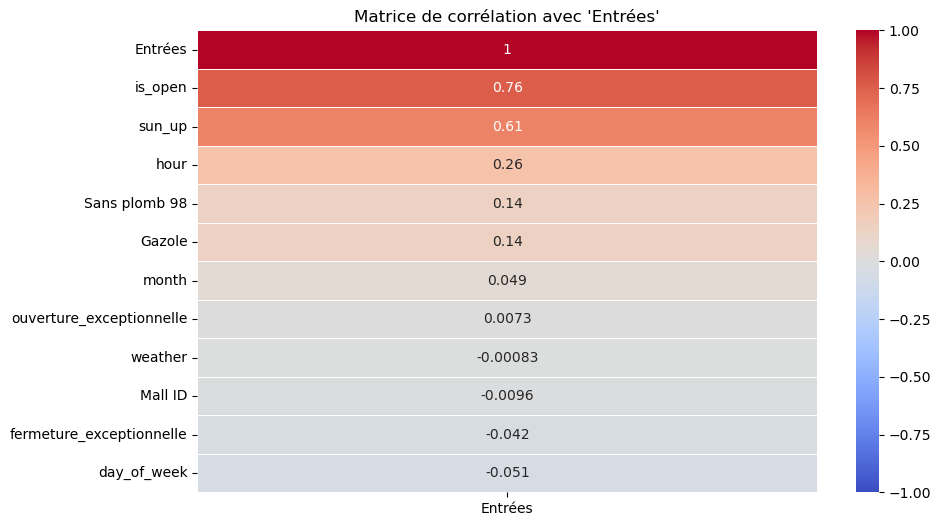

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer la matrice de corrélation
correlation_matrix = df_ml_fe_oe.corr(numeric_only=True)

# Générer une heatmap de corrélation avec 'Entrées' mis en avant
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['Entrées']].sort_values(by='Entrées', ascending=False), 
            annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

plt.title("Matrice de corrélation avec 'Entrées'")
plt.show()


📊 Traitement du Mall ID 53...


c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

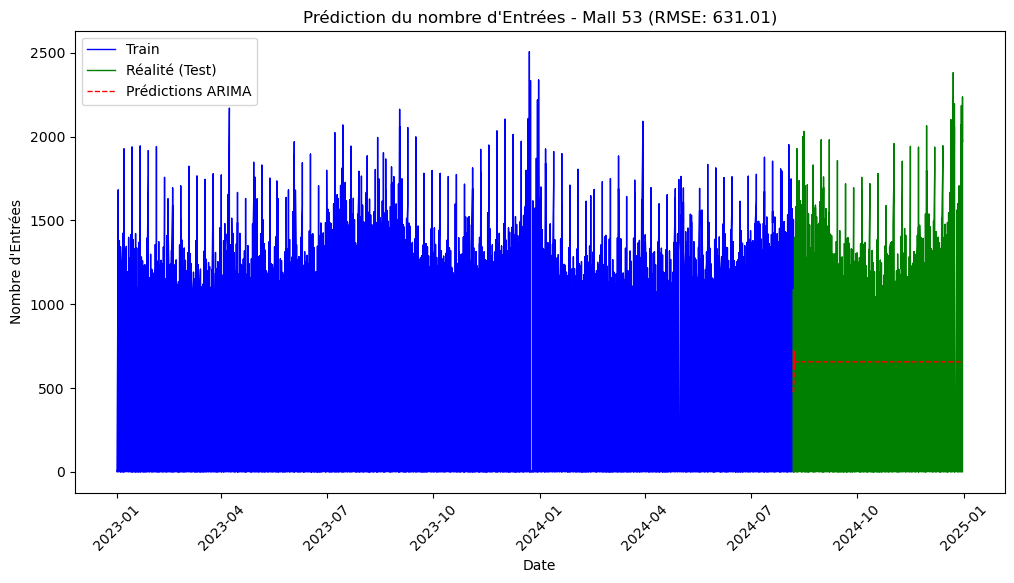

📊 Traitement du Mall ID 38...


c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

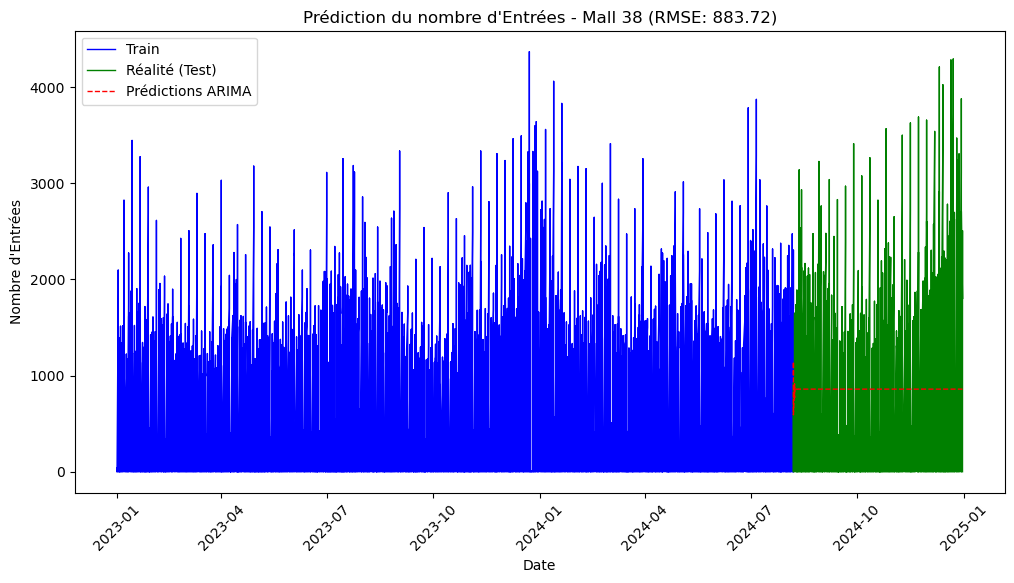

📊 Traitement du Mall ID 37...


c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

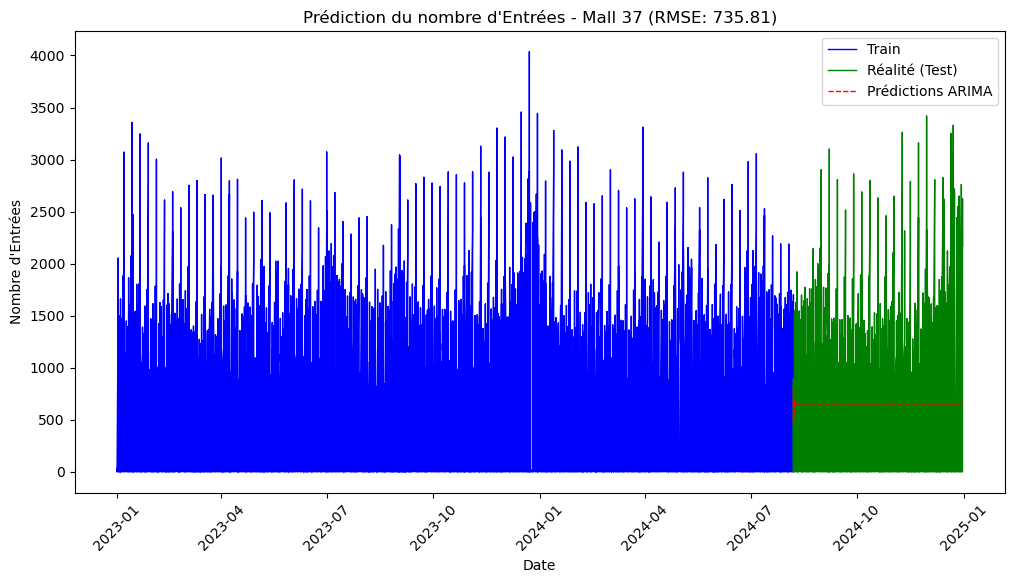

📊 Traitement du Mall ID 5...


c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

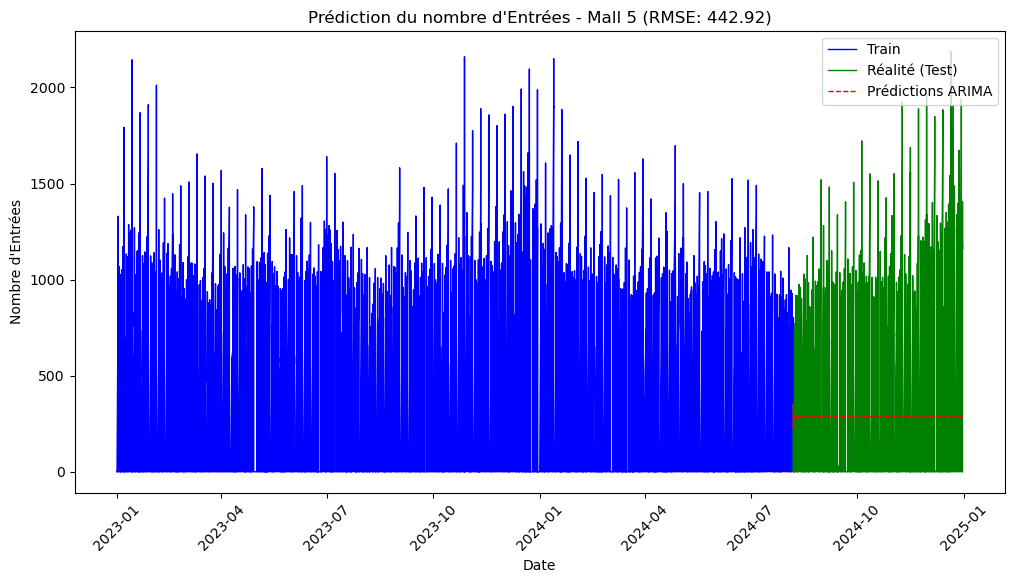

📊 Traitement du Mall ID 20...


c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

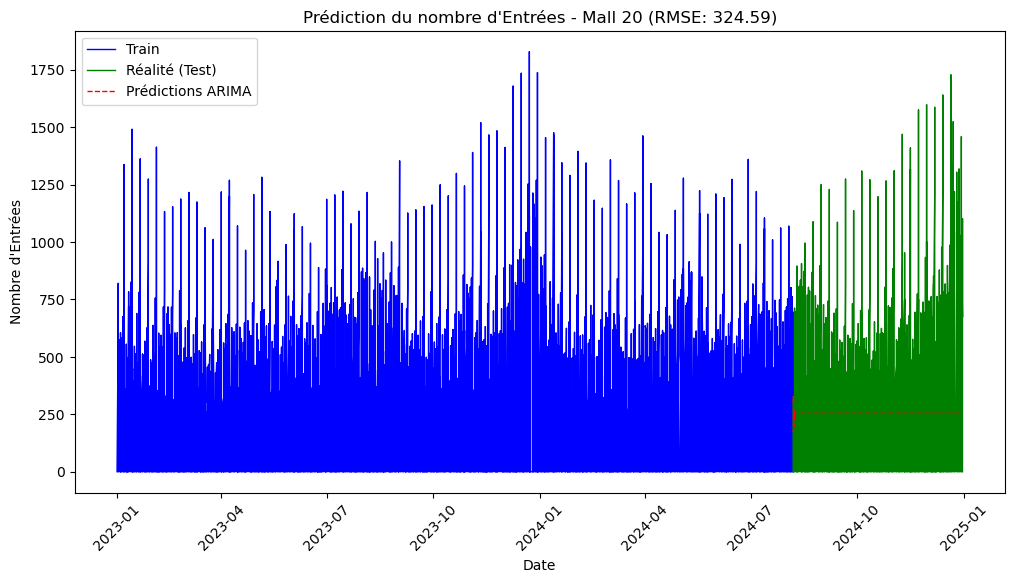

📊 Traitement du Mall ID 71...


c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

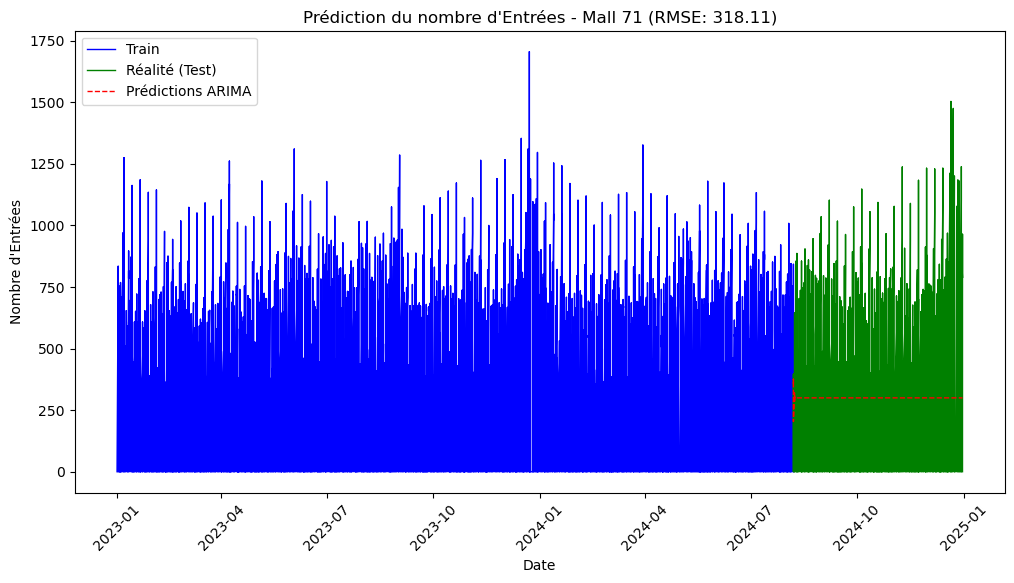

📊 Traitement du Mall ID 10...


c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

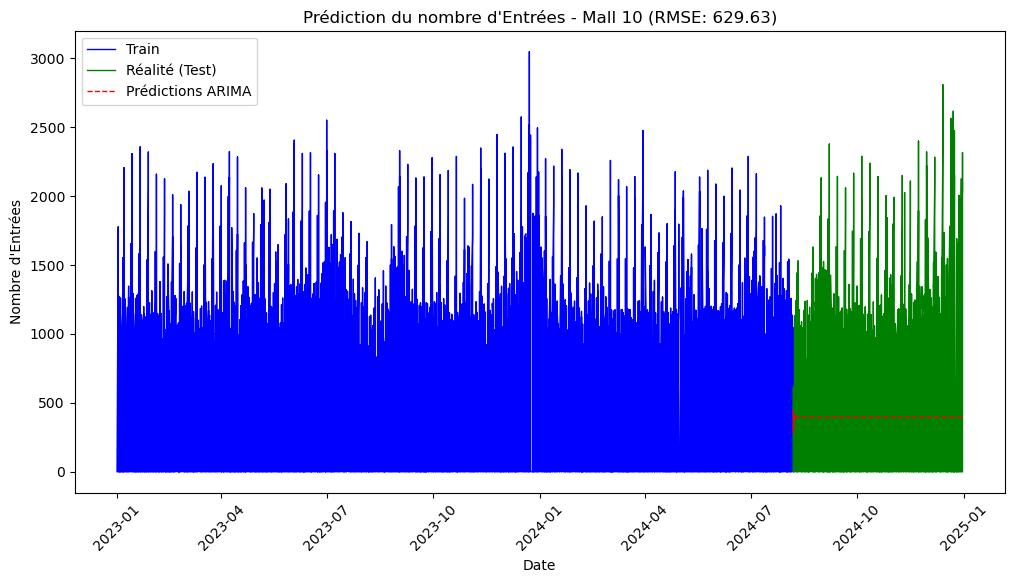

📊 Traitement du Mall ID 11...


c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

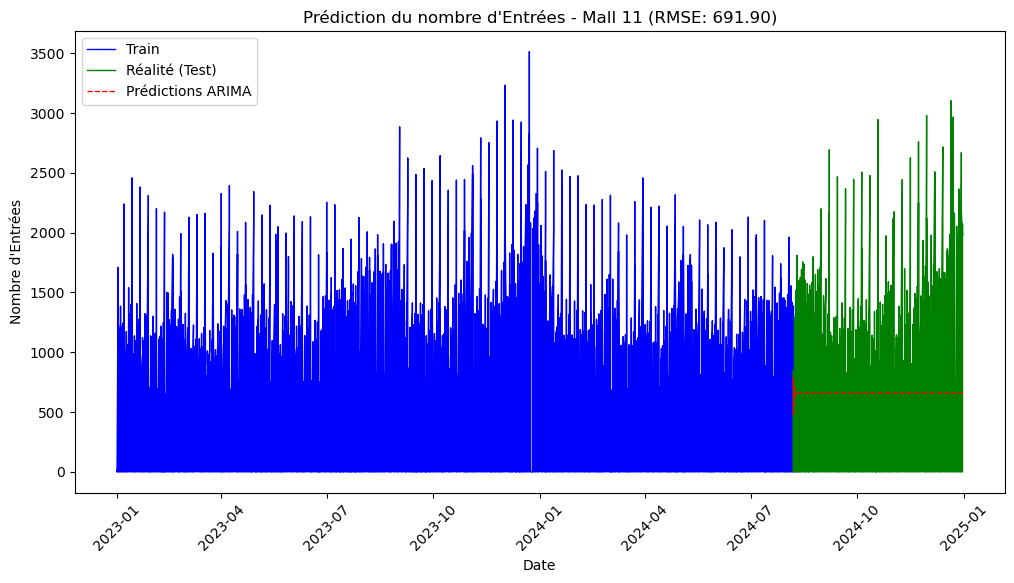

📊 Traitement du Mall ID 47...


c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

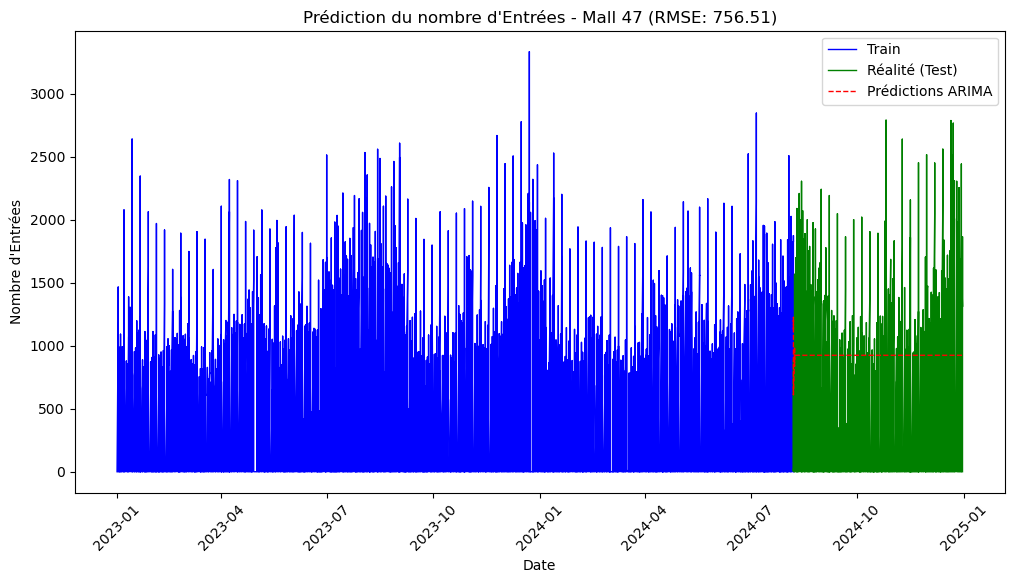

📊 Traitement du Mall ID 19...


c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\David\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

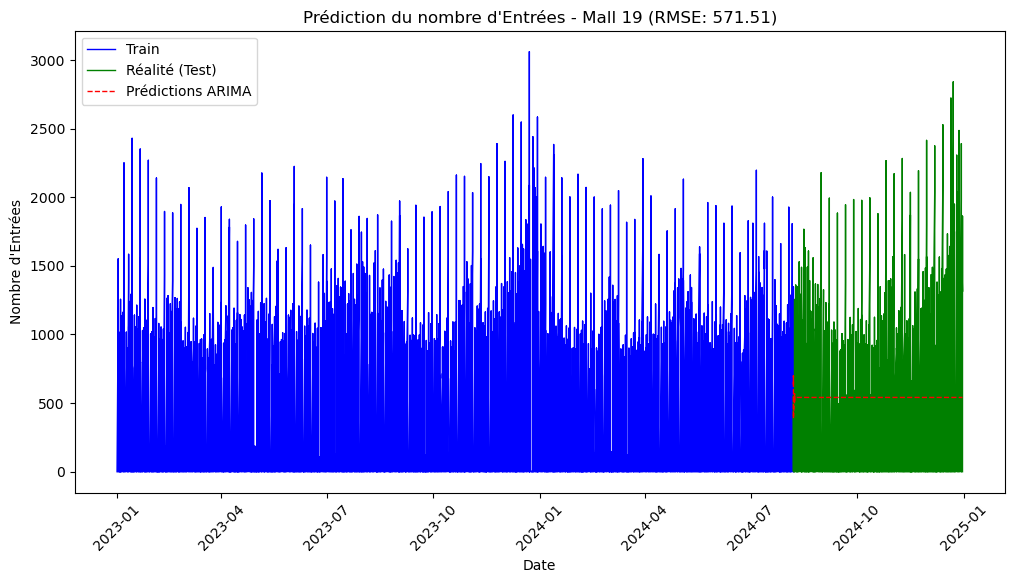

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Stocker les résultats RMSE
rmse_results = {}

# Boucle sur chaque Mall ID
for mall in df_ml_fe_oe['Mall ID'].unique():
    print(f"📊 Traitement du Mall ID {mall}...")

    # Filtrer les données du mall
    df_mall = df_ml_fe_oe[df_ml_fe_oe['Mall ID'] == mall].copy()

    # Vérifier s'il y a assez de données
    if df_mall.shape[0] < 30:
        print(f"⚠️ Pas assez de données pour {mall}, on passe au suivant.")
        continue

    # Trier les données par date
    df_mall = df_mall.sort_values(by='date')

    # Définir train/test (80% train, 20% test)
    split_idx = int(len(df_mall) * 0.8)
    train, test = df_mall.iloc[:split_idx], df_mall.iloc[split_idx:]

    # Entraîner un modèle ARIMA simple
    try:
        model = ARIMA(train['Entrées'], order=(5,1,0))  # (p,d,q) = (5,1,0) peut être ajusté
        model_fit = model.fit()

        # Prédictions sur la période test
        predictions = model_fit.forecast(steps=len(test))

        # Calculer la RMSE
        rmse = np.sqrt(mean_squared_error(test['Entrées'], predictions))
        rmse_results[mall] = rmse

        # Plot des résultats
        plt.figure(figsize=(12, 6))
        plt.plot(train['date'], train['Entrées'], label="Train", color='blue', linewidth=1)
        plt.plot(test['date'], test['Entrées'], label="Réalité (Test)", color='green', linewidth=1)
        plt.plot(test['date'], predictions, label="Prédictions ARIMA", color='red', linestyle="dashed", linewidth=1)
        plt.title(f"Prédiction du nombre d'Entrées - Mall {mall} (RMSE: {rmse:.2f})")
        plt.xlabel("Date")
        plt.ylabel("Nombre d'Entrées")
        plt.xticks(rotation=45)
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"⚠️ Problème avec {mall} : {e}")
        continue

# Afficher les RMSE sous forme de DataFrame
rmse_df = pd.DataFrame(list(rmse_results.items()), columns=['Mall ID', 'RMSE'])
rmse_df = rmse_df.sort_values(by='RMSE')


